In [8]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
import time
from tqdm import tqdm

np.random.seed(42)
num_average_time = 10        # Number of times to run each experiment to calculate the average values

M_values = [1,2,3,4,5]         # M: number of binary features 
N_values = [5,10,15,20,25,30]  # N: number of samples

num_average_time kept at 10 iterations because of large amount of time consumption. For every m,n we have 30 iterations and running every iteration 100 times results in 3000 iterations! Even if my decision tree takes 1s to fit and predict, it will take approx. 50 minutes for one case. There are 4 such cases!

Test case 1
Real Input and Real Output

In [9]:
time_calculated = [] #[[M,N,avg time taken to fit, avg time taken to predict],[],[],....]

for m in M_values:
    for n in N_values:
        time_per_iter_fit = []
        time_per_iter_predict = []
        for t in tqdm(range(num_average_time)):
            N = n
            M = m
            X = pd.DataFrame(np.random.randn(N, M))
            y = pd.Series(np.random.randn(N))
            tree = DecisionTree(max_depth = 3)  # Split based on gini index
            start_time = time.time()
            tree.fit(X, y)
            end_time = time.time()
            time_per_iter_fit.append(end_time - start_time)
            start_time = time.time()
            y_hat = tree.predict(X)
            end_time = time.time()
            time_per_iter_predict.append(end_time - start_time)
        time_calculated.append([m,n,np.mean(time_per_iter_fit),np.mean(time_per_iter_predict)])



100%|██████████| 10/10 [00:24<00:00,  2.49s/it]


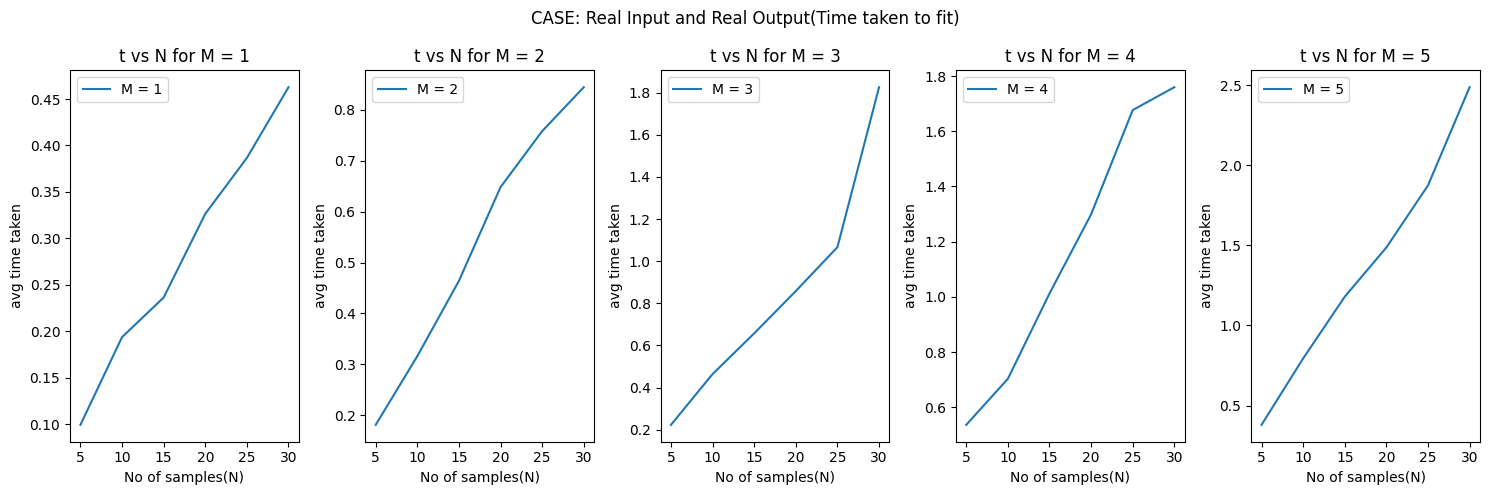

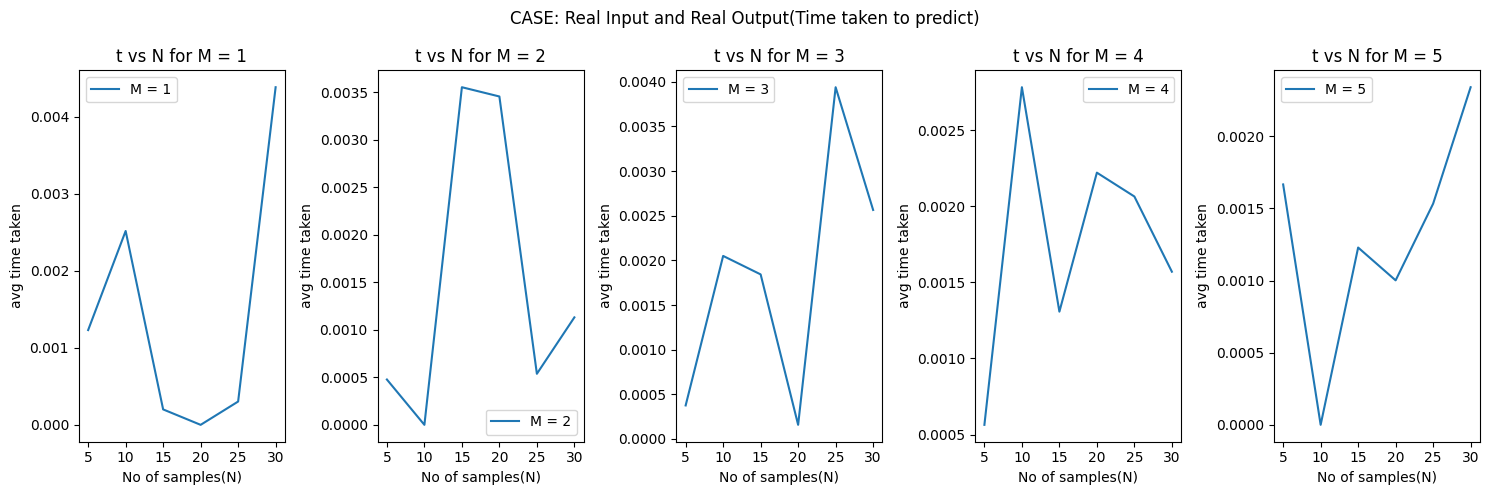

In [16]:
plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_fit = [t[2] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_fit , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Real Input and Real Output(Time taken to fit)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_predict = [t[3] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_predict , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Real Input and Real Output(Time taken to predict)")
plt.tight_layout()
plt.show()

Test case 2
Real Input and Discrete Output

In [18]:
time_calculated = [] #[[M,N,avg time taken to fit, avg time taken to predict],[],[],....]

for m in M_values:
    for n in N_values:
        time_per_iter_fit = []
        time_per_iter_predict = []
        for t in range(num_average_time):
            N = n
            M = m
            X = pd.DataFrame(np.random.randn(N, M))
            y = pd.Series(np.random.randint(M, size=N), dtype="category")
            tree = DecisionTree(max_depth = 3)  # Split based on gini index
            start_time = time.time()
            tree.fit(X, y)
            end_time = time.time()
            time_per_iter_fit.append(end_time - start_time)
            start_time = time.time()
            y_hat = tree.predict(X)
            end_time = time.time()
            time_per_iter_predict.append(end_time - start_time)
        time_calculated.append([m,n,np.mean(time_per_iter_fit),np.mean(time_per_iter_predict)])



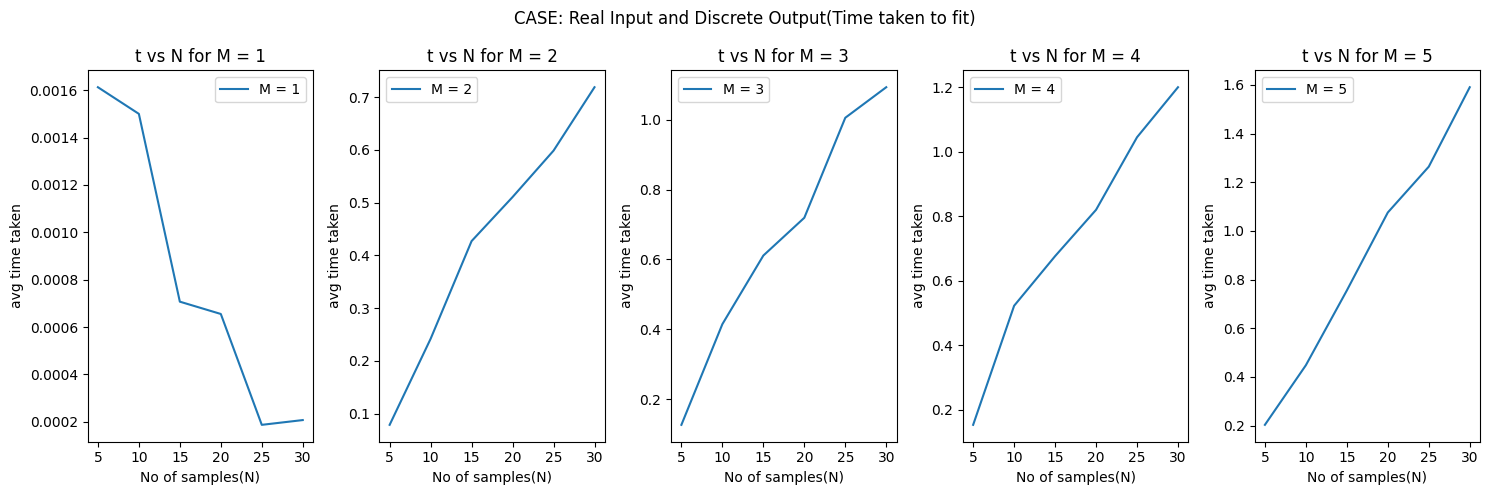

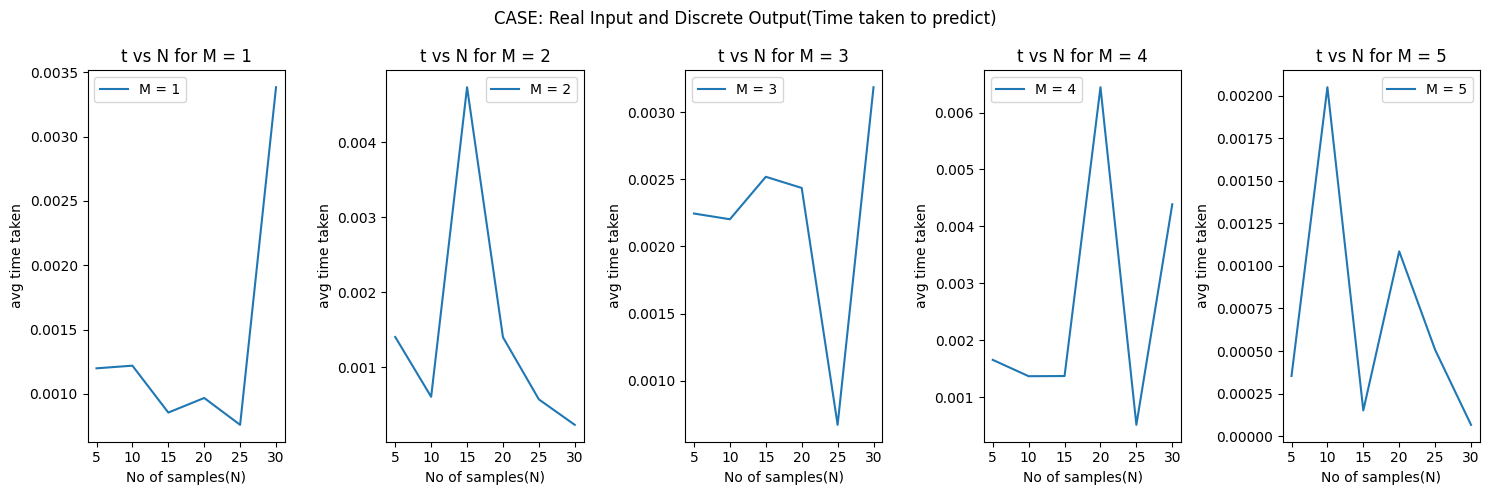

In [19]:
plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_fit = [t[2] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_fit , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Real Input and Discrete Output(Time taken to fit)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_predict = [t[3] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_predict , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Real Input and Discrete Output(Time taken to predict)")
plt.tight_layout()
plt.show()

Test case 3
Discrete Input and Discrete Output

In [20]:
time_calculated = [] #[[M,N,avg time taken to fit, avg time taken to predict],[],[],....]

for m in M_values:
    for n in N_values:
        time_per_iter_fit = []
        time_per_iter_predict = []
        for t in range(num_average_time):
            N = n
            M = m
            X = pd.DataFrame({i: pd.Series(np.random.randint(M, size=N), dtype="category") for i in range(5)})
            y = pd.Series(np.random.randint(M, size=N), dtype="category")
            tree = DecisionTree(max_depth = 3)  # Split based on gini index
            start_time = time.time()
            tree.fit(X, y)
            end_time = time.time()
            time_per_iter_fit.append(end_time - start_time)
            start_time = time.time()
            y_hat = tree.predict(X)
            end_time = time.time()
            time_per_iter_predict.append(end_time - start_time)
        time_calculated.append([m,n,np.mean(time_per_iter_fit),np.mean(time_per_iter_predict)])



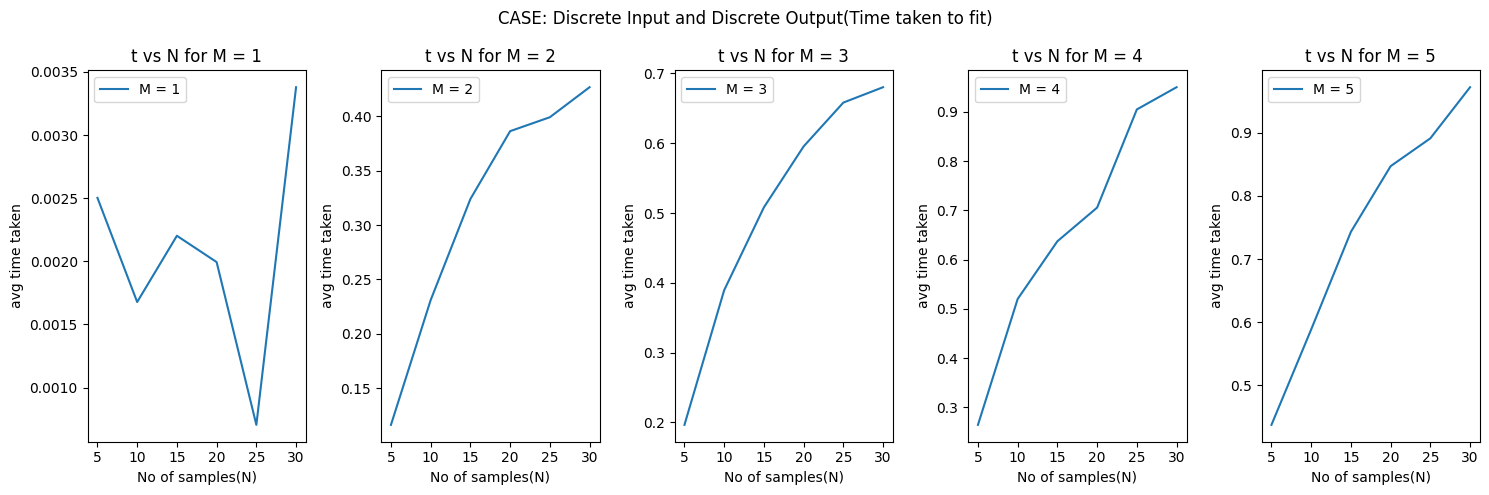

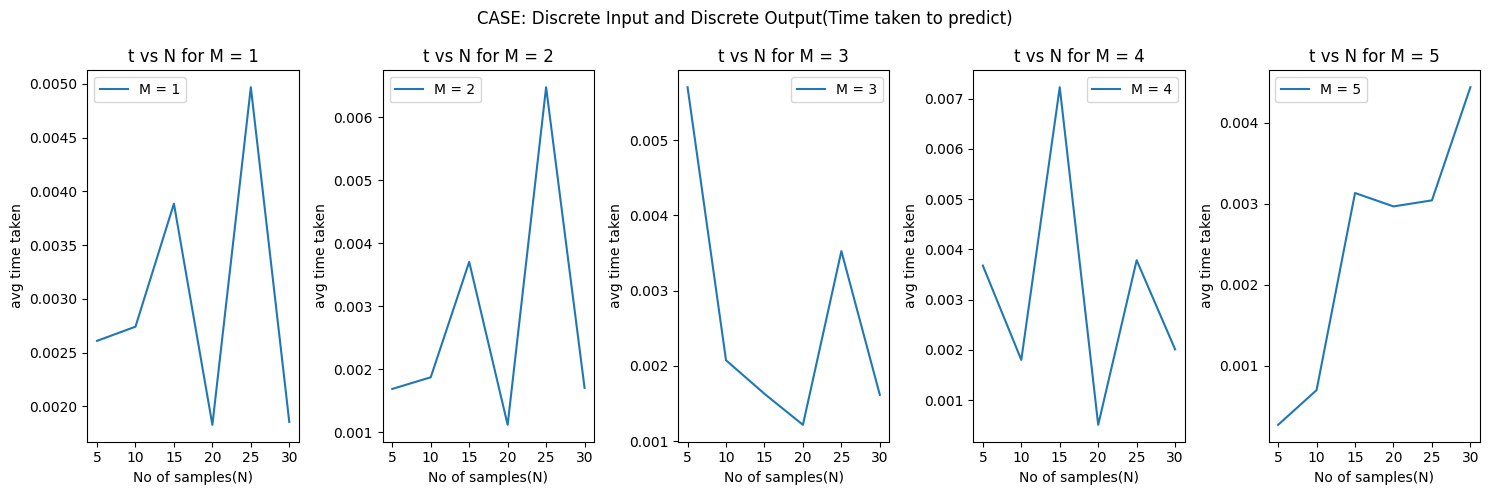

In [21]:
plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_fit = [t[2] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_fit , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Discrete Input and Discrete Output(Time taken to fit)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_predict = [t[3] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_predict , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Discrete Input and Discrete Output(Time taken to predict)")
plt.tight_layout()
plt.show()

Test case 4
Discrete Input and Real Output

In [22]:
time_calculated = [] #[[M,N,avg time taken to fit, avg time taken to predict],[],[],....]

for m in M_values:
    for n in N_values:
        time_per_iter_fit = []
        time_per_iter_predict = []
        for t in range(num_average_time):
            N = n
            M = m
            X = pd.DataFrame({i: pd.Series(np.random.randint(M, size=N), dtype="category") for i in range(5)})
            y = pd.Series(np.random.randn(N))
            tree = DecisionTree(max_depth = 3)  # Split based on gini index
            start_time = time.time()
            tree.fit(X, y)
            end_time = time.time()
            time_per_iter_fit.append(end_time - start_time)
            start_time = time.time()
            y_hat = tree.predict(X)
            end_time = time.time()
            time_per_iter_predict.append(end_time - start_time)
        time_calculated.append([m,n,np.mean(time_per_iter_fit),np.mean(time_per_iter_predict)])



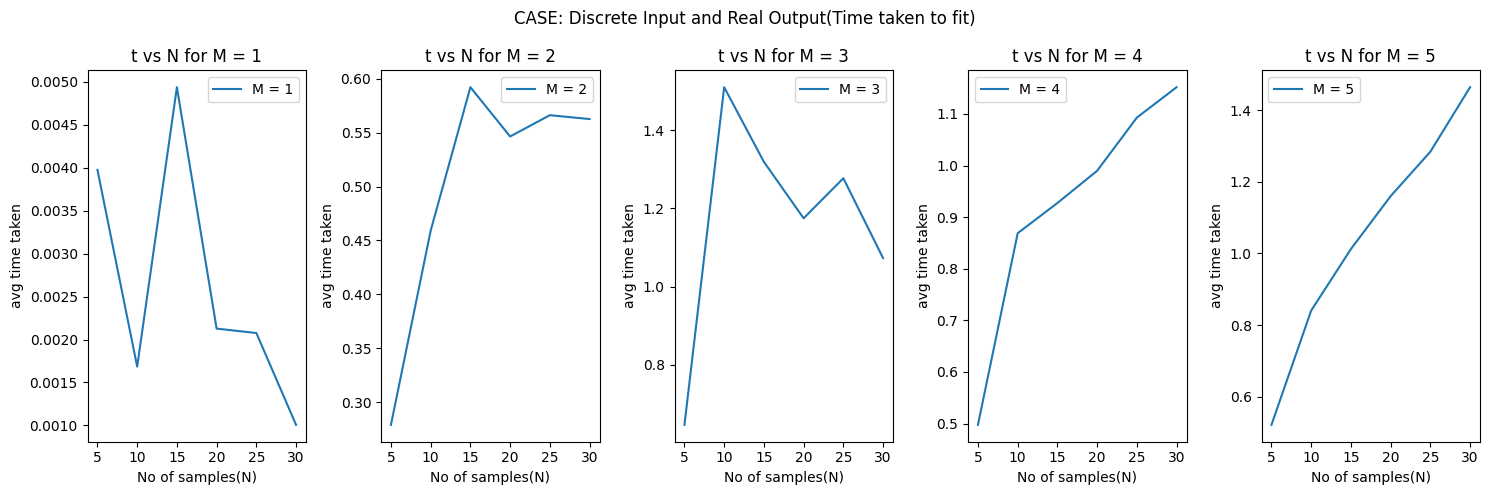

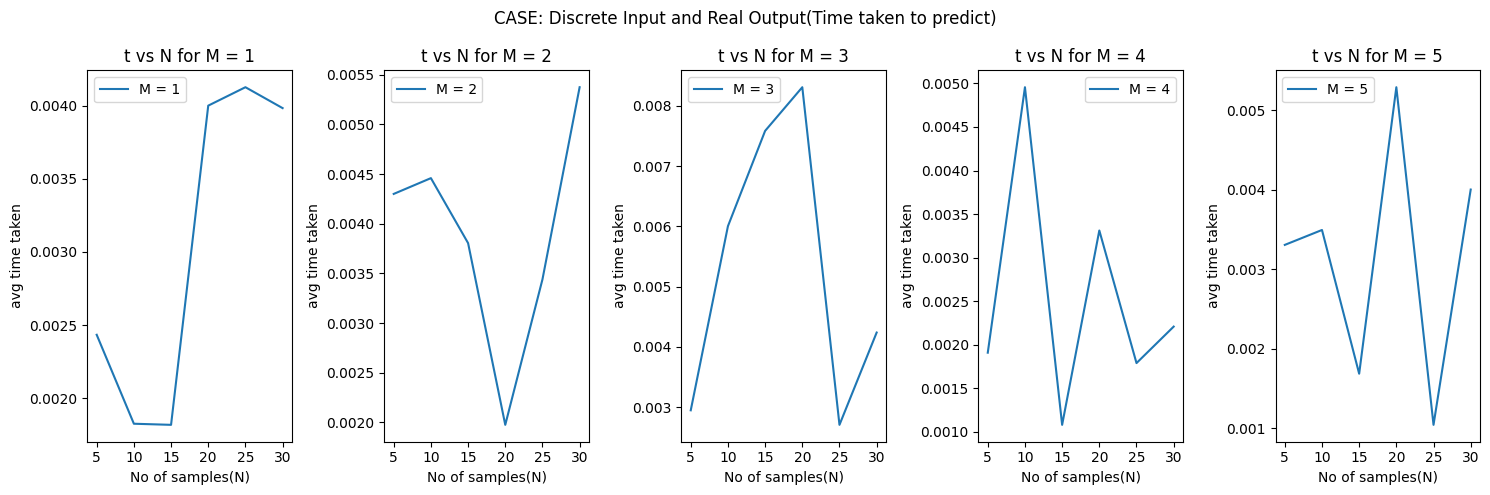

In [23]:
plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_fit = [t[2] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_fit , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Discrete Input and Real Output(Time taken to fit)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for m in M_values:
    plt.subplot(1, 5, m)
    plt.xlabel("No of samples(N)")
    plt.xticks(N_values)
    plt.ylabel("avg time taken")
    avg_time_predict = [t[3] for t in time_calculated if t[0]==m]
    plt.plot(N_values, avg_time_predict , label = f"M = {m}")
    plt.title(f"t vs N for M = {m}")
    plt.legend()

plt.suptitle("CASE: Discrete Input and Real Output(Time taken to predict)")
plt.tight_layout()
plt.show()

Theoritical time complexities for a deciosion tree wiht M binary features and N samples and depth D is:

    Training Time Complexity: O(M×N×2^D)
    Prediction Time Complexity: O(N×D)

This applies to both regression and classification tasks using decision trees.

OBSERVATIONS:
The variation of time taken with N is mostly linear. 
As we keep increasing M, the avg time taken increases.
We observe that as N increases for a given M, avg time taken to fit and predict mostly increses, but we also see decrease in avg time taken in some cases. But , overall the avg of the graph is a straight line.